In [1]:
%load_ext autoreload
%autoreload 2
import pickle, json
from enterprise_extensions.models import model_2a
from enterprise.signals.parameter import sample as sample_params
import numpy as np
from impulse.impulse import sample
import matplotlib.pyplot as plt
from emcee.autocorr import integrated_time

In [2]:
with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/psrs.pkl', 'rb') as f:
    psrs = pickle.load(f)

with open('/Users/aaron/Documents/GitHub/12p5yr_stochastic_analysis/tutorials/data/channelized_12p5yr_v3_full_noisedict.json', 'r') as f:
    params = json.load(f)

In [3]:
pta = model_2a([psrs[0]], noisedict=params, gamma_common=4.33, n_gwbfreqs=5, tm_marg=True, tnequad=True, tm_svd=True)

In [4]:
x0 = np.array(list(sample_params(pta.params).values()))

In [5]:
pta.get_lnprior([-1, -14, -13])

/Users/aaron/mambaforge/envs/rosettaprise/lib/python3.9/site-packages/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


-inf

In [7]:
chain = sample(pta.get_lnlikelihood, pta.get_lnprior, len(pta.params), x0, num_samples=1_000_000)

100%|██████████| 990/990 [02:29<00:00,  6.62it/s]


In [8]:
import corner

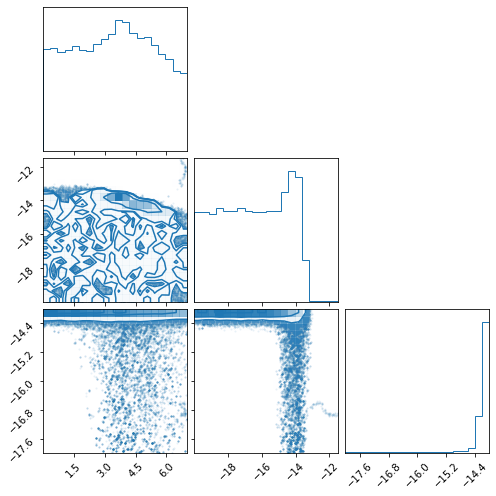

In [21]:
thing = corner.corner(chain[::10, :3], hist2d_kwargs={"density":True}, color='C0')
plt.show()

In [15]:
from PTMCMCSampler.PTMCMCSampler import PTSampler as ptmcmc

Do not have acor package


In [16]:
ndim = len(x0)
cov = np.diag(np.ones(ndim) * 0.01**2)

outDir = './chains/sngl/'

sampler = ptmcmc(ndim, pta.get_lnlikelihood, pta.get_lnprior, cov,
                 outDir=outDir, resume=False)

In [16]:
N = int(1e6)
x0 = np.hstack([p.sample() for p in pta.params])
sampler.sample(x0, N, SCAMweight=30, AMweight=15, DEweight=50, )

Finished 0.10 percent in 0.294292 s Acceptance rate = 0.93

/Users/aaron/mambaforge/envs/rosettaprise/lib/python3.9/site-packages/enterprise/signals/parameter.py:62: RuntimeWarning: divide by zero encountered in log
  logpdf = np.log(self.prior(value, **kwargs))


Finished 1.00 percent in 2.133857 s Acceptance rate = 0.333533Adding DE jump with weight 50
Finished 99.90 percent in 180.976778 s Acceptance rate = 0.210117
Run Complete


In [17]:
with open(outDir + 'chain_1.txt', 'r') as f:
    chain2 = np.loadtxt(f)

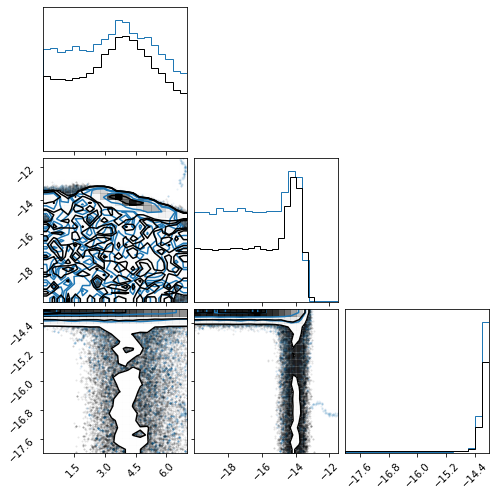

In [22]:
corner.corner(chain2[20_000:, :3], hist2d_kwargs={'density':True}, fig=thing)

In [33]:
integrated_time(chain2[:, 2])

array([21.75829991])

In [32]:
integrated_time(chain[:, 2])

array([2156.59637634])